---
title: Trouble in High-Dimensional Land
date: 2018-12-31T17:16:50.000Z
description: >-
  Most of the intuitions we build in 2D and 3D break in higher dimensions, a core problem for most machine learning problems. So where do they break?
summary: >-
  How volume breaks down in high dimensions
image: assets/img/highdimensionalgeometry.png
echo: false
---

In [66]:
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
%matplotlib inline
import numpy as np

Let's dive into the world of high-dimensional geometry! 

When considering high-dimensional spaces (4 dimensions or higher), we rely on mental models and intuitions from 2D or 3D objects which generalize poorly to high dimensions. This is especially in machine learning, where estimators, decision boundaries, and pretty much everything else as well are defined in $d$-dimensional space (where $d$ is *very high*), and all our insights often collapse. This post will attempt to highlight some peculiarities of high-dimensional spaces, and their implications for machine learning applications.

## Volumes Concentrate on the Outside

In high-dimensional spaces, **volume concentrates on the outside**, exponentially more so, as dimension increases.

Let's first look at this fact through "hypercubes": when $d=1$, this is an interval, when $d=2$, a square, when $d=3$, a cube, and so on. Mathematically, a hypercube with edge-length $l$ centered at the origin corresponds to the set $$\mathcal{A}_{d}(l) = \{x \in \mathbb{R}^d ~~\vert~~ \|x\|_\infty \leq \frac{l}{2}\}$$

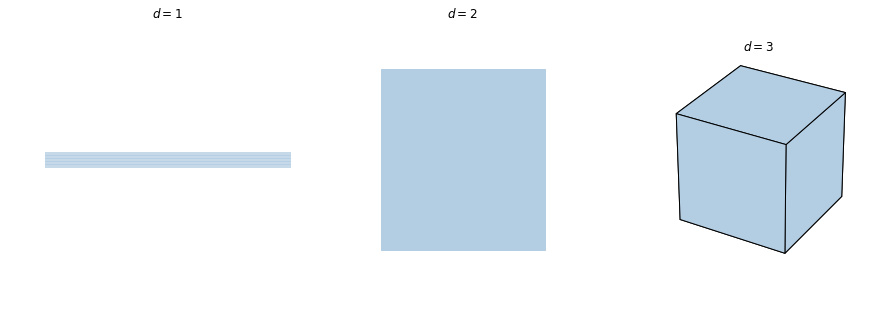

In [86]:
#| echo: false

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.hlines(np.linspace(-0.05,0.05,10),-1,1,color=blue_color)
#ax.hlines(np.linspace(-0.05,0.05,10),-0.33,0.33,color=red_color)
ax.axis('off')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_title('$d=1$')

ax = fig.add_subplot(132)
ax.add_patch(
     patches.Rectangle(
        (-1, -1),
        2,
        2,
        fill=True,
        color=blue_color# remove background
     ) )

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)
ax.axis('off')
ax.set_title('$d=2$ ')


ax = fig.add_subplot(133, projection='3d')

def plot_cube(cube_definition,color=(0,0,1,0.1)):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]


    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor(color)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('equal')
    ax.axis('off')


cube_definition = [
    (-1,-1,-1), (-1,1,-1), (1,-1,-1), (-1,-1,1)
]

cube_small_definition = [
    (-0.33,-0.33,-0.33), (-0.33,0.33,-0.33), (0.33,-0.33,-0.33), (-0.33,-0.33,0.33)
]

plot_cube(cube_definition, blue_color)
ax.set_title('$d=3$');

Volumes in $\mathbb{R}^d$ are calculated exactly like they are in 2 or 3 dimensions: the volume of a hyper-rectangle is the product of all of the edge lengths.By these calculations, hypercubes $\mathcal{A}_d(l)$ will have volume $\prod_{k=1}^d l = l^d$. 

Now, volumes of different dimensional objects aren't directly comparable (it's like comparing apples and oranges), but what we can look at are *relative volumes*. 

Say we have two hypercubes, one of length $l$ and another of $\frac{l}{3}$, what is the relative volume of the smaller cube to the larger cube? How does this proportion change as the dimension increases? Let's first visualize in the dimensions where we can.

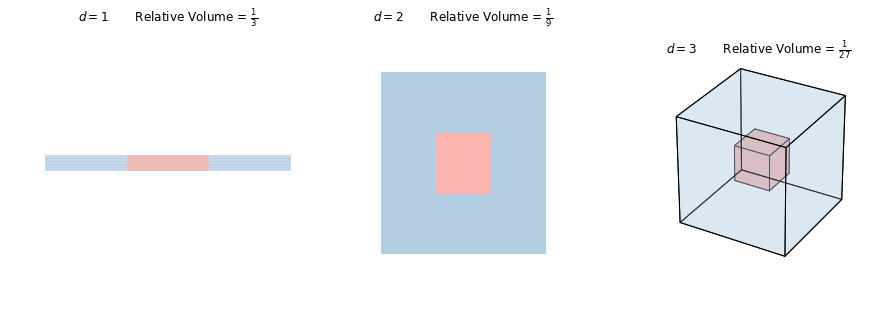

In [87]:
# HIDDEN


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.hlines(np.linspace(-0.05,0.05,10),-1,1,color=blue_color)
ax.hlines(np.linspace(-0.05,0.05,10),-0.33,0.33,color=red_color)
ax.axis('off')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_title('$d=1$       Relative Volume = $\\frac{1}{3}$')

ax = fig.add_subplot(132)
ax.add_patch(
     patches.Rectangle(
        (-1, -1),
        2,
        2,
        fill=True,
        color=blue_color# remove background
     ) )
ax.add_patch(
     patches.Rectangle(
        (-0.33, -0.33),
        0.66,
        0.66,
        fill=True,
        color=red_color# remove background
     ) )
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)
ax.axis('off')
ax.set_title('$d=2$       Relative Volume = $\\frac{1}{9}$')


ax = fig.add_subplot(133, projection='3d')

def plot_cube(cube_definition,color=(0,0,1,0.1)):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]


    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor(color)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('equal')
    ax.axis('off')


cube_definition = [
    (-1,-1,-1), (-1,1,-1), (1,-1,-1), (-1,-1,1)
]

cube_small_definition = [
    (-0.33,-0.33,-0.33), (-0.33,0.33,-0.33), (0.33,-0.33,-0.33), (-0.33,-0.33,0.33)
]
blue_color_transparent = list(blue_color)
blue_color_transparent[3] = 0.25
plot_cube(cube_definition, blue_color_transparent)
plot_cube(cube_small_definition,red_color)
ax.set_title('$d=3$       Relative Volume = $\\frac{1}{27}$');

Our visualizations indicate that as dimension increases, the relative volume of the smaller cube vanishes exponentially fast. We can confirm this mathematically as well with a simple calculation: 

$$\text{Relative Volume} = \frac{\text{Volume}(\mathcal{A}_{d}(\frac{l}{3}))}{\text{Volume}(\mathcal{A}_{d}(l))} = \frac{(l/3)^d}{l^d} = \left(\frac{1}{3}\right)^d$$

This implies that most of the volume in a hypercube lies around the edges (near the surface), and that very little volume lies in the center of the cube.

Why is this an issue for machine learning? Most optimization problems in machine learning can be written of the form:

$$\min_{x \in U_d} ~~~f(x)$$

where $U_d = A_d(1)$ is a unit hypercube. In many applications (including reinforcement learning), the function $f$ is sufficiently complicated that we can only evaluate *the value* of a function at a point, but no access to gradients or higher-order data from the function. A typical solution is **exhaustive search**: we test a grid of points in the space, and choose the point that has the best value. 

<!--
    ```
    function exhaustive_search(f, ε):
        # Find a solution to min f(x) with precision ε

        # Generate data points ((1/ε)^d of them)

        grid = [ (x_1, x_2, ..., x_d) 
            for x_1 in (0, ε, 2ε, ... 1-ε, 1),
            for x_2 in (0, ε, 2ε, ... 1-ε, 1),
            ... 
            for x_d in (0, ε, 2ε, ... 1-ε, 1),
        ]

        x_pred = arg min([f(x) for x in grid])
        return x_pred

    ```
-->

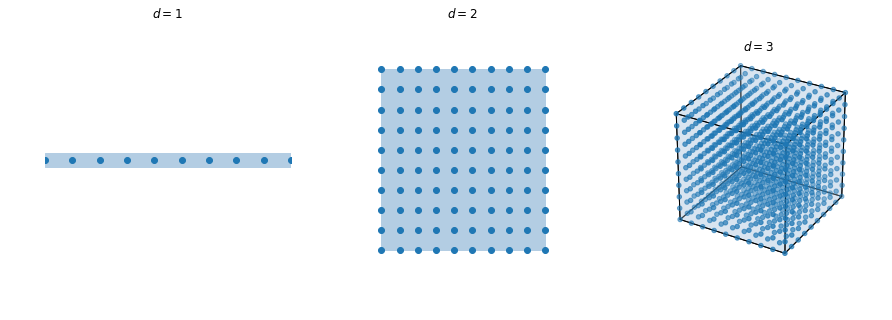

In [104]:
# HIDDEN

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.add_patch(
     patches.Rectangle(
        (-1, -0.05),
        2,
        0.1,
        fill=True,
        color=blue_color# remove background
     ) )

ax.scatter(np.linspace(-1,1,10), np.zeros(10),zorder=2)
#ax.hlines(np.linspace(-0.05,0.05,10),-0.33,0.33,color=red_color)
ax.axis('off')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_title('$d=1$')

ax = fig.add_subplot(132)
ax.add_patch(
     patches.Rectangle(
        (-1, -1),
        2,
        2,
        fill=True,
        color=blue_color# remove background
     ) )

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-1.5,1.5)
ax.axis('off')
ax.set_title('$d=2$ ')

x,y = np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,1,10))
x,y = x.flat[:], y.flat[:]
ax.scatter(x,y,zorder=2)

ax = fig.add_subplot(133, projection='3d')

def plot_cube(cube_definition,color=(0,0,1,0.1)):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]


    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor(color)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    #ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('equal')
    ax.axis('off')


cube_definition = [
    (-1,-1,-1), (-1,1,-1), (1,-1,-1), (-1,-1,1)
]

cube_small_definition = [
    (-0.33,-0.33,-0.33), (-0.33,0.33,-0.33), (0.33,-0.33,-0.33), (-0.33,-0.33,0.33)
]

blue_color_transparent = list(blue_color)
blue_color_transparent[3] = 0.3
plot_cube(cube_definition, blue_color_transparent)
x,y,z = np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,1,10),np.linspace(-1,1,10))
x,y,z = x.flat[:], y.flat[:], z.flat[:]
ax.scatter(x,y,z)
ax.set_title('$d=3$');

The number of points we need to test to get the same accuracy scales exponentially with dimension, for the exact same argument as the volume. To get accuracy $\varepsilon$ (that is $\left|f(\hat{x})-f(x^*)\right| < \varepsilon$ where $\hat{x}$ is our estimate and $x^*$ is the optimal point), the number of points we need to test is on the order of $\left(\frac{1}{\varepsilon}\right)^d$, which is exponential in dimension (a rigorous proof can be given assuming $f$ is Lipschitz continuous). This is often referred to as optimization's *curse of dimensionality*.

A similar problem exists when computing expectations of functions: a naive way one might compute an expectation is by evaluating the function on a grid of points, and averaging the values like in a Riemannian sum, and computing in this way would also take time exponential in dimension.

## Spheres and their Equators

Instead of considering cubes now, let's think about spheres. In particular, we'll think about the unit sphere in $d$ dimensions, which we'll call the $(d-1)$-sphere $S^{(d-1)}$ ($d=2$, a circle, $d=3$, a sphere). 

$$S^{(d-1)} = \{x \in \mathbb{R}^d~~\vert~~ \|x\|_2 = 1\}$$

A side note: Calling it a $(d-1)$-sphere may seem odd, but is standard mathematical notation; feel free to mentally substitute $d-1$ with $d$ if it helps improve intuition (the reason it's called a $(d-1)$-sphere is because the sphere is a manifold of dimension $d-1$)

The primary question we'll concern ourselves with is the following: 

**What proportion of points are near the equator?**

We'll approach the problem dually, by asking the question *how wide does a band around the equator need to be to capture $1-\varepsilon$ proportion of the points on the sphere?*

For the time being, we'll let $\varepsilon = \frac14$ (that is we hope to capture 75% of points), and let's start by investigating $d=2$ (the unit circle)

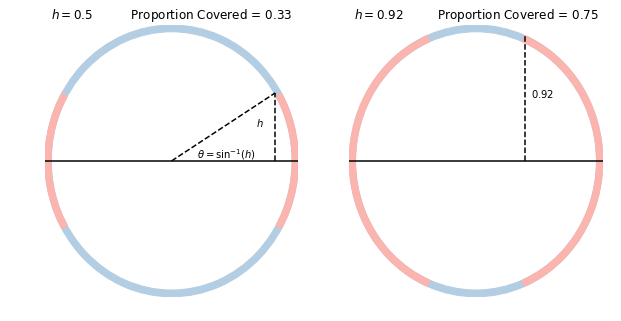

In [285]:
# HIDDEN

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

w = Wedge((0,0),1,0, 360, width=0.05,color=blue_color)
w_mid1 = Wedge((0,0),1,-30, 30, width=0.05,color=red_color)
w_mid2 = Wedge((0,0),1,180-30, 180+30, width=0.05,color=red_color)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
ax = axes[0]
ax.add_artist(w,)
ax.add_artist(w_mid1,)
ax.add_artist(w_mid2,)
ax.hlines(0,-1,1)
ax.vlines(np.sqrt(3)/2-0.05, 0, 1/2, linestyles='--')
ax.plot([0,np.sqrt(3)/2-0.05], [0, 1/2], 'k-', linestyle='--')
ax.text(np.sqrt(3)/2-0.2, 0.25, '$h$')
ax.text(0.2, 0.02, '$\\theta= \\sin^{-1}(h)$')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title("$h=0.5$ \t Proportion Covered = 0.33")
ax.axis('off');

theta = 67.5/180*np.pi
w = Wedge((0,0),1,0, 360, width=0.05,color=blue_color)
w_mid1 = Wedge((0,0),1, -67.5, 67.5, width=0.05,color=red_color)
w_mid2 = Wedge((0,0),1,180-67.5, 180+67.5, width=0.05,color=red_color)

ax = axes[1]
ax.add_artist(w,)
ax.add_artist(w_mid1,)
ax.add_artist(w_mid2,)
ax.hlines(0,-1,1)
ax.vlines(np.cos(theta), 0, np.sin(theta), linestyles='--')
ax.text(np.cos(theta)+0.05, np.sin(theta)/2, '$0.92$')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_title("$h=0.92$ \t Proportion Covered = 0.75")
ax.axis('off');

For circles ($d=2$), a band of arbitrary height $h$ covers $\frac{4\sin^{-1}(h)}{2\pi} = \frac{2}{\pi}\sin^{-1}(h)$ of the circumference (the picture above serves as a rough proof). To cover 75% of the space, we can solve to find that $h$ needs to be at least $0.92$. 

Now let's consider spheres ($d=3$).

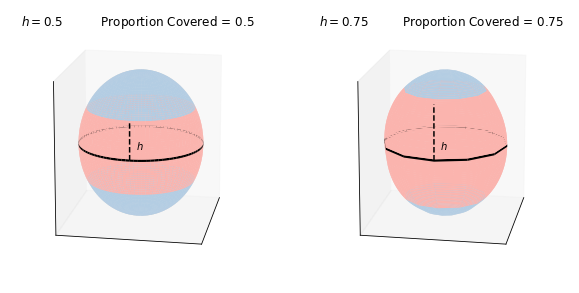

In [293]:
# HIDDEN

import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)




fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121, projection='3d')
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [blue_color[:3], blue_color[:3], 0.25, red_color[:3], red_color[:3], 0.49, c('black'), c('black'), 0.51, red_color[:3], red_color[:3], 0.75, blue_color[:3],])


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, cmap=rvb, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(-1,1)
ax.view_init(elev=15, azim=10)
ax.text3D(1,0.1,0.15,'$h$')
ax.plot3D(np.ones(10), np.zeros(10), np.linspace(0,0.50,10),c='black',linestyle='--')
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_zticks([], [])
ax.set_title("$h=0.5$ \t Proportion Covered = 0.5")

ax = fig.add_subplot(122, projection='3d')
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [blue_color[:3], blue_color[:3], 0.125, red_color[:3], red_color[:3], 0.49, c('black'), c('black'), 0.51, red_color[:3], red_color[:3], 0.875, blue_color[:3],])


u = np.linspace(0, 2 * np.pi, 13)
v = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, cmap=rvb, rstride=1, cstride=1, linewidth=0)
ax.set_zlim(-1,1)
ax.view_init(elev=15, azim=10)
ax.text3D(1,0.1,0.15,'$h$')
ax.plot3D(np.ones(10), np.zeros(10), np.linspace(0,0.75,10),c='black',linestyle='--')
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_zticks([], [])
ax.set_title("$h=0.75$ \t Proportion Covered = 0.75");

For spheres, a band of height $h$ covers a proportion $h$ of the surface area (one can look at [spherical caps](https://en.wikipedia.org/wiki/Spherical_cap) to derive the formula). Then to cover 75% of the space, we need a band with half-width only $0.75$, which is significantly less than the $0.92$ required for a circle. This seems to indicate the following hypothesis, that we shall now investigate:

**Hypothesis**: As dimension increases, more of the points on the sphere reside closer to the equator.


Let's jump into $d$ dimensions. For low-dimensional folks like ourselves, analyzing  volumes for a $(d-1)$-sphere is difficult, so we'll instead consider the problem *probabilistically*. What does it mean for a band to cover $1-\varepsilon$ proportion of the sphere? With probability, we can imagine it as saying

> If we sample a point uniformly at random from the $(d-1)$-sphere, the probability that it lands in the band is $1-\varepsilon$.

How can we sample a point uniformly at random from the $(d-1)$ sphere? If we recall the symmetry of the *multivariate Gaussian distribution* about the origin, we encounter an elegant way to sample points from the sphere, by sampling such a vector, and then normalizing it to lie on the sphere.

In [294]:
def sample_sphere(d):
    # Sample a point uniformly from a (d-1) sphere
    x = np.random.randn(d)
    return x / np.linalg.norm(x)

We can investigate this problem empirically by sampling many points from a $(d-1)$-sphere, plot their "x"-coordinates, and find a band that contains 75% of the points. Below, we show it for d = 3 (the sphere), 9, 27, and 81.

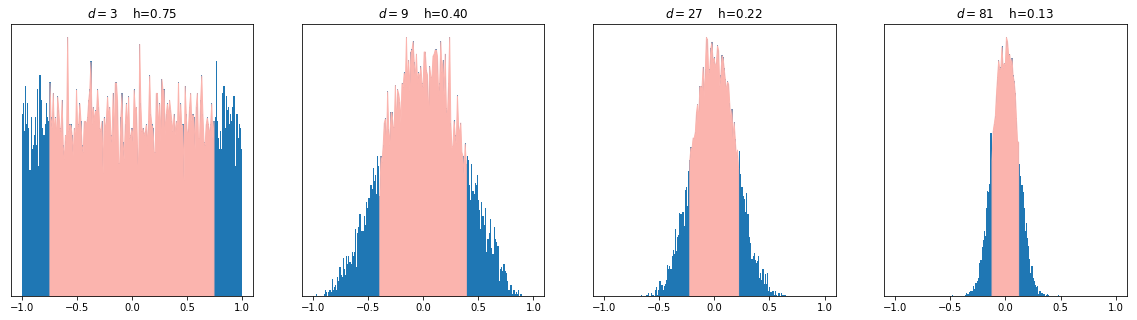

In [342]:
# HIDDEN

def sample_many_from_sphere(d, n=1000):
    x = np.random.randn(n,d)
    return x / np.linalg.norm(x, axis=1,keepdims=True)
from scipy.interpolate import interp1d

fig, axes = plt.subplots(1,4,figsize=(20,5))

for n, ax in zip(range(1,5), axes):
    xs = sample_many_from_sphere(3**n,10000)[:,0]
    vals = ax.hist(xs,bins=np.linspace(-1,1,200),density=True)
    point = np.sort(np.abs(xs))[7500]
    l = int((-1 * point)*100 + 100)
    r = int(point*100+100)
    ax.fill_between(vals[1][l:r], vals[0][l:r], alpha=1, color=red_color,zorder=2)
    ax.set_title('$d=%d$    h=%.02f'%(3**n,point))
    ax.get_yaxis().set_visible(False)

Notice that as the dimension increases, the x-coordinates group up very close to the center, and a great majority of them can be captured by very small bands. This yields an interesting point that is not at all intuitive!

**In high dimensions, almost all points lie very close to the equator**

We can also examine how quickly this clusters by plotting the required height to get 75% of the points as dimension varies: this is shown below.

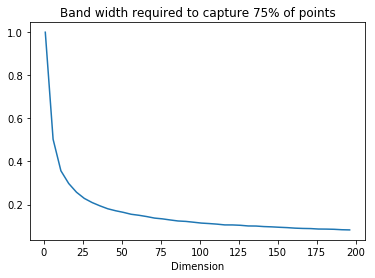

In [352]:
# HIDDEN

def sample_many_from_sphere(d, n=1000):
    x = np.random.randn(n,d)
    return x / np.linalg.norm(x, axis=1,keepdims=True)
from scipy.interpolate import interp1d


ds = []
hs = []
for n in range(1,200,5):
    xs = sample_many_from_sphere(n,10000)[:,0]
    hs.append(np.sort(np.abs(xs))[7500])
    ds.append(n)
plt.plot(ds,hs)
plt.title('Band width required to capture 75% of points')
plt.xlabel('Dimension');

We can also prove how quickly points concentrate near the equator mathematically: we show that the square deviation of a point from the equator is distributed according to a Beta($\frac{1}{2}, \frac{d-1}{2}$) distribution, which shows that *points concentrate in measure around the equator* - that is, the probability that points lie outside of a band of fixed width around the equator goes to $0$ as the dimension increases. See the proof below.

<!-- PROOF -->
We provide some analysis of this problem.


Consider sampling uniformly on the $(d-1)$-sphere: we can do so by sampling $(Z_1, \dots Z_d) \sim \mathcal{N}(0, I_d)$, and then normalizing to get $(X_1, \dots, X_d) = \frac{1}{\sqrt{\sum Z_k^2}}(Z_1, \dots Z_d)$. What is the distribution of $X_1$? First, let's consider what the distribution of $X_1^2$ is:

$$X_1^2 = \frac{Z_1^2}{\sum Z_k^2} = \frac{Z_1^2}{Z_1^2 + \sum_{k > 1} Z_k^2}$$

Now, recall that $Z_k^2$ is Gamma($r=\frac12, \lambda=\frac12$) and so by the closure of the family of Gamma distributions, $Z_1^2 \sim \text{Gamma}(r=\frac12, \lambda=\frac12)$ and $\sum_{k > 1} Z_k^2 \sim \text{Gamma}(r=\frac{d-1}{2},\lambda=\frac12)$. Gamma distributions possess the interesting property that if $X \sim \text{Gamma}(r_1, \lambda)$ and $Y \sim \text{Gamma}(r_2, \lambda)$, then $\frac{X}{X+Y} \sim \text{Beta}(r_1, r_2)$. Then we simply have that $X_1^2 \sim \text{Beta}(\frac{1}{2}, \frac{d-1}{2})$. 

Now, this is a profound fact, and we can get a lot of insight from this formula, but for the time being, we'll use a simple Markov Bound to show that as $d \to \infty$, $X_1$ converges in probability to $0$ (that is that points come very close to the equator). For an arbitrary $\varepsilon$,
$$P(|X| > \varepsilon) = P(X^2 > \varepsilon^2) \leq \frac{E(X^2)}{\varepsilon^2} = \frac{1}{d\epsilon^2}$$

This completes the statement.

<!--

## Gaussians in High Dimensions

In the first section, we talked about how for a unit hypercube in high dimensions, most of the volume was contained near the outside of the hypercubes towards the surface. Probabilistically, if we sampled a point uniformly at random from a hypercube, with high probability it will be near the surface. This intuition is very powerful for bounded regions, but what happens when we sample from a probability distribution that is defined on all of $\mathbb{R}^d$? More particularly, consider specifying a random variable from the standard multivariate Gaussian distribution: $Z = (Z_1, \dots Z_{d}) \sim \mathcal{N}(\vec{0}, I_d)$. 

-->

## Summary and Perspective: Probability Distributions and the "Typical Set"

The core tool in statistical inference is the expectation operator: most operations, whether querying the posterior distribution for Bayesian inference or computing confidence intervals for estimators or doing variational inference, etc. The core problem is then to *accurately estimate expectations* of some function $g$ with respect to some probability distribution $\pi$ where $\pi$ and $g$ are defined on some high-dimensional space ($\mathbb{R}^d$).

$$\mathbb{E}_{X \sim \pi}[g(X)] = \int_{\mathbb{R}^d} g d\pi = \int_{\mathbb{R}^d} g(x) f_\pi(x) dx$$

In the first section, we spent a little time discussing how one may compute this expectation integral: previously, we talked about evaluating the integrand at a grid of points, and averaging (as in a Riemann sum) to arrive at our estimate. However, in practice, we don't need to evaluate at all the points, only at the points that contribute meaningfully to the integral, that is we want to only evaluate in regions of high probability (places where points concentrate).  

The previous two sections have hinted at the following fact: 
> *For probability distributions in high-dimensional spaces, most of the probability concentrates in small regions (not necessarily the full space).*

- For points sampled at uniform from inside a hypercube, with overwhelming probability, it will be near the surface of the hypercube and not in the center.
- For points sampled at uniform from the surface of a hypersphere, with overwhelming probability, the points will lie near the *equator* of the sphere.


This concept can be made rigorous with the **typical set**, a set $A_\epsilon$ such that $P_\pi(X \in A_{\epsilon} > 1 - \epsilon)$. Then, if $g(x)$ is well-behaved enough, we can write

$$\mathbb{E}_{X \sim \pi}[g(X)] = \int_{\mathbb{R}^d} g d\pi =  \int_{A_{\epsilon}} g d\pi + \int_{A_{\epsilon}^C} g d\pi \approx \int_{A_{\epsilon}} g d\pi$$

What will help us is that for most distributions, this typical set is actually rather small compared to the full high-dimensional space. In the next article, we'll consider how we can efficiently sample from the typical sets of probability distributions, which will introduce us to topics like *Markov Chain Monte Carlo*, *Metropolis-Hastings*, and *Hamiltonian Monte Carlo*. 